## Build Workflow from Fireworks yaml files

In [111]:
%load_ext autoreload
%autoreload 2
%config Application.log_level="DEBUG"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [113]:
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [114]:
from tabulate import tabulate
from pprint import pprint

In [115]:
from fireworks.utilities.wfb import WorkflowBuilder

# Build workflow from templates

In [120]:
try:
    wfb = WorkflowBuilder('system_8n.yaml')
    wfb.build_dir = 'build'
    wfb.initialize_template_engine()
    print(wfb.show_undefined_variables())
    ### Conversion to tree with degenerate vertices
    wfb.descend()
    wfb.build_degenerate_graph()
    wfb.plot()
    print(wfb.show_attributes())
    ## Build Workflow
    wfb.fill_templates()
    wf = wfb.compile_workflow()
except Exception as e:
    exception = e
    print(exception)


INFO:fireworks.utilities.wfb:File 'system_8n.yaml contains the sections ['name', 'metadata', 'std', 'transient', 'persistent', 'dependencies'].
INFO:fireworks.utilities.wfb:Graph contains 4 nodes: ['fw_010_file_retrieval.yaml', 'fw_050_lmp_bench_production.yaml', 'fw_100_filepad_add.yaml', 'fw_150_remote_file_transfer.yaml'].
INFO:fireworks.utilities.wfb:Graph contains 3 edges: [('fw_010_file_retrieval.yaml', 'fw_050_lmp_bench_production.yaml'), ('fw_050_lmp_bench_production.yaml', 'fw_100_filepad_add.yaml'), ('fw_050_lmp_bench_production.yaml', 'fw_150_remote_file_transfer.yaml')].
INFO:fireworks.utilities.wfb:Identified root fw_010_file_retrieval.yaml.
INFO:fireworks.utilities.wfb:Loading template fw_010_file_retrieval.yaml.
INFO:fireworks.utilities.wfb:Loading template fw_050_lmp_bench_production.yaml.
INFO:fireworks.utilities.wfb:Loading template fw_090_equilibration_npt_slab.yaml.
INFO:fireworks.utilities.wfb:Loading template fw_100_filepad_add.yaml.
INFO:fireworks.utilities.wfb:L

DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_file_retrieval.yaml_000010:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/benchmark/lmp/20190412', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'system_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped_nptEquilibrated.lammps', 'surfactant': 'SDS', 'worker': 'nemo_noqueue', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'ci_preassembly': 'at polar heads', 'counterion': 'NA', 'indenter': 'AU', 'indenter_dist': 7.5, 'indenter_dist_unit': 'nm', 'indenter_pdb': '50Ang_stepped', 'indenter_vel': 0.1, 'indenter_vel_unit': 'm s^-1', 'pressure': 1, 'pressure_unit': 'atm', 'sb_crystal_plane': 111, 'sb_mult

INFO:fireworks.utilities.wfb:Added vertex 10 - fw_050_lmp_bench_production.yaml_000010_000040
INFO:fireworks.utilities.wfb:Added vertex 11 - fw_100_filepad_add.yaml_000010_000040
INFO:fireworks.utilities.wfb:Added vertex 12 - fw_150_remote_file_transfer.yaml_000010_000040
INFO:fireworks.utilities.wfb:Added edge 9 - (0-10)
INFO:fireworks.utilities.wfb:Added edge 10 - (10-11)
INFO:fireworks.utilities.wfb:Added edge 11 - (10-12)
INFO:fireworks.utilities.wfb:          Instance 10 - 40 - fw_050_lmp_bench_production.yaml_000040 of class 1 - fw_050_lmp_bench_production.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 2:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 3:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/benchmark/lmp/20190412', 'ssh_key': '/home/fr/fr_fr/f

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/benchmark/lmp/20190412', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'system_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped_nptEquilibrated.lammps', 'surfactant': 'SDS', 'worker': 'nemo_queue_offline', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'ci_preassembly': 'at polar heads', 'counterion': 'NA', 'indenter': 'AU', 'indenter_dist': 7.5, 'indenter_dist_unit': 'nm', 'indenter_pdb': '50Ang_stepped', 'indenter_vel': 0.1, 'indenter_vel_unit': 'm s^-1', 'pressure': 1, 'pressure_unit': 'atm', 'sb_crystal_plane': 111, 'sb_multiples': [51, 30, 2], 'sb_name': 'AU_111_51x30x2', 'sf_nmolecules': 646, 'sf_preassembly': 'hemicylinders', 'solvent': 'H2O', 'substrate': 'AU', 'sv_density': 997, 'sv_densit

INFO:fireworks.utilities.wfb:    Iterating persitent content update 8:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/benchmark/lmp/20190412', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'system_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped_nptEquilibrated.lammps', 'surfactant': 'SDS', 'worker': 'nemo_noqueue', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'ci_preassembly': 'at polar heads', 'counterion': 'NA', 'indenter': 'AU', 'indenter_dist': 7.5, 'indenter_dist_unit': 'nm', 'indenter_pdb': '50Ang_stepped', 'indenter_vel': 0.1, 'indenter_vel_unit': 'm s^-1', 'pressure': 1, 'pressure_unit': 'atm', 'sb_crystal_plane': 111, 'sb_multiples': [51, 30, 2], 'sb_name': 'AU_111_51x30x2', 'sf_nmolecules': 646, 'sf_preassembly': 'hemicylinders', 'solvent': 'H2O', 'substrate': 'AU', 'sv_density': 997, 'sv_density_unit': 

INFO:fireworks.utilities.wfb:Added vertex 34 - fw_050_lmp_bench_production.yaml_000010_000120
INFO:fireworks.utilities.wfb:Added vertex 35 - fw_100_filepad_add.yaml_000010_000120
INFO:fireworks.utilities.wfb:Added vertex 36 - fw_150_remote_file_transfer.yaml_000010_000120
INFO:fireworks.utilities.wfb:Added edge 33 - (0-34)
INFO:fireworks.utilities.wfb:Added edge 34 - (34-35)
INFO:fireworks.utilities.wfb:Added edge 35 - (34-36)
INFO:fireworks.utilities.wfb:          Instance 34 - 120 - fw_050_lmp_bench_production.yaml_000120 of class 1 - fw_050_lmp_bench_production.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 10:
INFO:fireworks.utilities.wfb:      Modified graph at node 1, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 1: fw_050_lmp_bench_production.yaml_000020
INFO:fireworks.utilities.wfb:Current topological order: [0, 31, 33, 32, 28, 30, 29, 25, 27, 

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_050_lmp_bench_production.yaml_000120:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/benchmark/lmp/20190412', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'system_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped_nptEquilibrated.lammps', 'surfactant': 'SDS', 'worker': 'nemo_noqueue', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'ci_preassembly': 'at polar heads', 'counterion': 'NA', 'indenter': 'AU', 'indenter_dist': 7.5, 'indenter_dist_unit': 'nm', 'indenter_pdb': '50Ang_stepped', 'indenter_vel': 0.1, 'indenter_vel_unit': 'm s^-1', 'pressure': 1, 'pressure_u

INFO:fireworks.utilities.wfb:Added vertex 34 - fw_150_remote_file_transfer.yaml_000010_000110_000150
INFO:fireworks.utilities.wfb:Added edge 33 - (28-34)
INFO:fireworks.utilities.wfb:          Instance 34 - 150 - fw_150_remote_file_transfer.yaml_000150 of class 30 - fw_150_remote_file_transfer.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:      Modified graph at node 30, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 30: fw_050_lmp_bench_production.yaml_000120
INFO:fireworks.utilities.wfb:Current topological order: [0, 30, 32, 31, 28, 33, 29, 25, 27, 26, 22, 24, 23, 19, 21, 20, 16, 18, 17, 13, 15, 14, 10, 12, 11, 7, 9, 8, 4, 6, 5, 1, 3, 2]
INFO:fireworks.utilities.wfb:0: fw_010_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:30: fw_050_lmp_bench_production.yaml_000120 has been vi

DEBUG:fireworks.utilities.wfb:  Parent name: fw_050_lmp_bench_production.yaml_000100
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/benchmark/lmp/20190412', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'system_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped_nptEquilibrated.lammps', 'surfactant': 'SDS', 'worker': 'nemo_noqueue', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'ci_preassembly': 'at polar heads', 'counterion': 'NA', 'indenter': 'AU', 'indenter_dist': 7.5, 'indenter_dist_unit': 'nm', 'indenter_pdb': '50Ang_stepped', 'indenter_vel': 0.1, 'indenter_vel_unit': 'm s^-1', 'pressure': 1, 'pressure_unit': 'atm', 'sb_crystal_plane': 111, 'sb_multiples': [51, 30, 2], 'sb_name': 'AU_111_51x30x2', 'sf_nmolecules': 646, 'sf_preassembly': 'hemicylinders', 'solvent': 'H2O', 'substrate': 'AU', 'sv_density': 997, 'sv_density_unit': 'k

╒════════════════════════════════════╤════════╤═════════╤═══════════════╤═════════════╤══════════╤═════════════╤═══════════╤════════════╤═════════╤═════════╤═══════╤═══════════════════╤═════════════╤═══════════╤═══════════════╤══════════════╤══════════╤════════════════════╤═══════════════╤═════════════╤═════════════════╤══════════════════╤═════╤════════════════╤════════════╤═════════╤════════════════╤══════════════════╤════════════╤═════════════╤══════════════╤══════════╤═══════════════╤══════════════╤════════════════╤════════════════╤════════════════╤═══════════════════╤═══════╤════════════╕
│                                    │ worker │ machine │ sf_nmolecules │ neigh_check │ walltime │ neigh_every │ remote_ip │ counterion │ sb_name │ solvent │ queue │ indenter_vel_unit │ remote_user │ substrate │ skin_distance │ indenter_vel │ pressure │ indenter_dist_unit │ pressure_unit │ neigh_delay │ sv_density_unit │ temperature_unit │ ppn │ coulomb_cutoff │ surfactant │ ssh_key │ ewald_accura

INFO:fireworks.utilities.wfb:25: fw_050_lmp_bench_production.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:33: fw_150_remote_file_transfer.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:26: fw_100_filepad_add.yaml_000010_000100.
INFO:fireworks.utilities.wfb:Iterating node 26: fw_100_filepad_add.yaml_000010_000100
INFO:fireworks.utilities.wfb:26: fw_100_filepad_add.yaml_000010_000100, dist. 2, top.pos. 3 has 1 parents with distances [1]:
INFO:fireworks.utilities.wfb:  25: fw_050_lmp_bench_production.yaml_000100, dist. 1, top. pos. 1
INFO:fireworks.utilities.wfb:    Maximum distance 1 at parent [25]
INFO:fireworks.utilities.wfb:  25: fw_050_lmp_bench_production.yaml_000100, dist. 1, top. pos. 1 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 11
DEBUG:fireworks.utilities.wfb:  Parent name: fw_050_lmp_bench_production.yaml_000100
DEBUG:fireworks.utilities.wfb:  Parent context: {'mach

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_050_lmp_bench_production.yaml_000090:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/benchmark/lmp/20190412', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'system_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped_nptEquilibrated.lammps', 'surfactant': 'SDS', 'worker': 'nemo_noqueue', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'ci_preassembly': 'at polar heads', 'counterion': 'NA', 'indenter': 'AU', 'indenter_dist': 7.5, 'indenter_dist_unit': 'nm', 'indenter_pdb': '50Ang_stepped', 'indenter_vel': 0.1, 'indenter_vel_unit': 'm s^-1', 'pressure': 1, 'pressure_u

INFO:fireworks.utilities.wfb:Added vertex 34 - fw_100_filepad_add.yaml_000010_000090_000200
INFO:fireworks.utilities.wfb:Added edge 33 - (22-34)
INFO:fireworks.utilities.wfb:          Instance 34 - 200 - fw_100_filepad_add.yaml_000200 of class 23 - fw_100_filepad_add.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:      Modified graph at node 23, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 23: fw_050_lmp_bench_production.yaml_000100
INFO:fireworks.utilities.wfb:Current topological order: [0, 25, 27, 26, 24, 29, 28, 23, 31, 30, 22, 33, 32, 19, 21, 20, 16, 18, 17, 13, 15, 14, 10, 12, 11, 7, 9, 8, 4, 6, 5, 1, 3, 2]
INFO:fireworks.utilities.wfb:0: fw_010_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_050_lmp_bench_production.yaml_000120 has been visited before, move on.
INFO

INFO:fireworks.utilities.wfb:27: fw_150_remote_file_transfer.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_050_lmp_bench_production.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:30: fw_100_filepad_add.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:29: fw_150_remote_file_transfer.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_050_lmp_bench_production.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:32: fw_100_filepad_add.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:31: fw_150_remote_file_transfer.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_050_lmp_bench_production.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:33: fw_150_remote_file_transfer.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_100_filepad_add.yam

INFO:fireworks.utilities.wfb:  16: fw_050_lmp_bench_production.yaml_000070, dist. 1, top. pos. 1
INFO:fireworks.utilities.wfb:    Maximum distance 1 at parent [16]
INFO:fireworks.utilities.wfb:  16: fw_050_lmp_bench_production.yaml_000070, dist. 1, top. pos. 1 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 11
DEBUG:fireworks.utilities.wfb:  Parent name: fw_050_lmp_bench_production.yaml_000070
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/benchmark/lmp/20190412', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'system_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped_nptEquilibrated.lammps', 'surfactant': 'SDS', 'worker': 'nemo_noqueue', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'ci_preassembly': 'at polar heads', 'counterion': 'NA', 'indenter': 'AU', 'indenter_dist': 7.5, 'inden

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_050_lmp_bench_production.yaml_000070:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/benchmark/lmp/20190412', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'system_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped_nptEquilibrated.lammps', 'surfactant': 'SDS', 'worker': 'nemo_noqueue', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'ci_preassembly': 'at polar heads', 'counterion': 'NA', 'indenter': 'AU', 'indenter_dist': 7.5, 'indenter_dist_unit': 'nm', 'indenter_pdb': '50Ang_stepped', 'indenter_vel': 0.1, 'indenter_vel_unit': 'm s^-1', 'pressure': 1, 'pressure_u

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/benchmark/lmp/20190412', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'system_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_50Ang_stepped_nptEquilibrated.lammps', 'surfactant': 'SDS', 'worker': 'nemo_noqueue', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'ci_preassembly': 'at polar heads', 'counterion': 'NA', 'indenter': 'AU', 'indenter_dist': 7.5, 'indenter_dist_unit': 'nm', 'indenter_pdb': '50Ang_stepped', 'indenter_vel': 0.1, 'indenter_vel_unit': 'm s^-1', 'pressure': 1, 'pressure_unit': 'atm', 'sb_crystal_plane': 111, 'sb_multiples': [51, 30, 2], 'sb_name': 'AU_111_51x30x2', 'sf_nmolecules': 646, 'sf_preassembly': 'hemicylinders', 'solvent': 'H2O', 'substrate': 'AU', 'sv_density': 997, 'sv_density_unit

INFO:fireworks.utilities.wfb:Added vertex 34 - fw_100_filepad_add.yaml_000010_000060_000260
INFO:fireworks.utilities.wfb:Added edge 33 - (13-34)
INFO:fireworks.utilities.wfb:          Instance 34 - 260 - fw_100_filepad_add.yaml_000260 of class 14 - fw_100_filepad_add.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:      Modified graph at node 14, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 14: fw_050_lmp_bench_production.yaml_000070
INFO:fireworks.utilities.wfb:Current topological order: [0, 19, 21, 20, 18, 23, 22, 17, 25, 24, 16, 27, 26, 15, 29, 28, 14, 31, 30, 13, 33, 32, 10, 12, 11, 7, 9, 8, 4, 6, 5, 1, 3, 2]
INFO:fireworks.utilities.wfb:0: fw_010_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_050_lmp_bench_production.yaml_000120 has been visited before, move on.
INFO

INFO:fireworks.utilities.wfb:Completed node 12: fw_050_lmp_bench_production.yaml_000060
INFO:fireworks.utilities.wfb:Current topological order: [0, 18, 20, 19, 17, 22, 21, 16, 24, 23, 15, 26, 25, 14, 28, 27, 13, 30, 29, 12, 32, 31, 10, 33, 11, 7, 9, 8, 4, 6, 5, 1, 3, 2]
INFO:fireworks.utilities.wfb:0: fw_010_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:18: fw_050_lmp_bench_production.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_100_filepad_add.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_150_remote_file_transfer.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:17: fw_050_lmp_bench_production.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_100_filepad_add.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_150_remote_file_transfer.yaml_000150 has been visited before, move on.
INFO:

INFO:fireworks.utilities.wfb:19: fw_100_filepad_add.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:18: fw_150_remote_file_transfer.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_050_lmp_bench_production.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_100_filepad_add.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_150_remote_file_transfer.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:15: fw_050_lmp_bench_production.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_100_filepad_add.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_150_remote_file_transfer.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_050_lmp_bench_production.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_100_filepad_add.yaml_000200 

INFO:fireworks.utilities.wfb:15: fw_050_lmp_bench_production.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_100_filepad_add.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_150_remote_file_transfer.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_050_lmp_bench_production.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_100_filepad_add.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_150_remote_file_transfer.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_050_lmp_bench_production.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_100_filepad_add.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_150_remote_file_transfer.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_050_lmp_bench_production.yam

INFO:fireworks.utilities.wfb:19: fw_100_filepad_add.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:18: fw_150_remote_file_transfer.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_050_lmp_bench_production.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_100_filepad_add.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_150_remote_file_transfer.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_050_lmp_bench_production.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_100_filepad_add.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_150_remote_file_transfer.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_050_lmp_bench_production.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_100_filepad_add.yaml_000220 

INFO:fireworks.utilities.wfb:13: fw_050_lmp_bench_production.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:18: fw_100_filepad_add.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:17: fw_150_remote_file_transfer.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_050_lmp_bench_production.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_100_filepad_add.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_150_remote_file_transfer.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_050_lmp_bench_production.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_100_filepad_add.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_150_remote_file_transfer.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:10: fw_050_lmp_bench_production.yam

INFO:fireworks.utilities.wfb:15: fw_100_filepad_add.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_150_remote_file_transfer.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_050_lmp_bench_production.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:17: fw_100_filepad_add.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_150_remote_file_transfer.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_050_lmp_bench_production.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_100_filepad_add.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:18: fw_150_remote_file_transfer.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:10: fw_050_lmp_bench_production.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_100_filepad_add.yaml_000200 

INFO:fireworks.utilities.wfb:Current topological order: [0, 12, 14, 13, 11, 16, 15, 10, 18, 17, 9, 20, 19, 8, 22, 21, 7, 24, 23, 6, 26, 25, 5, 28, 27, 4, 30, 29, 3, 32, 31, 1, 33, 2]
INFO:fireworks.utilities.wfb:0: fw_010_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_050_lmp_bench_production.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_100_filepad_add.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_150_remote_file_transfer.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_050_lmp_bench_production.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_100_filepad_add.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:15: fw_150_remote_file_transfer.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:10: fw_050_lmp_bench_production.yaml_000100 has been visited bef

INFO:fireworks.utilities.wfb:Added edge 33 - (1-34)
INFO:fireworks.utilities.wfb:          Instance 34 - 340 - fw_100_filepad_add.yaml_000340 of class 2 - fw_100_filepad_add.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:      Modified graph at node 2, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 2: fw_050_lmp_bench_production.yaml_000030
INFO:fireworks.utilities.wfb:Current topological order: [0, 11, 13, 12, 10, 15, 14, 9, 17, 16, 8, 19, 18, 7, 21, 20, 6, 23, 22, 5, 25, 24, 4, 27, 26, 3, 29, 28, 2, 31, 30, 1, 33, 32]
INFO:fireworks.utilities.wfb:0: fw_010_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_050_lmp_bench_production.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_100_filepad_add.yaml_000140 has been visited before, move on.
IN

--  ---------------------------------------  --------------------------------  -----  ----  ----------  -----
    name                                     template                          order  dist  degeneracy  fw_id
0   fw_010_file_retrieval.yaml_000010        fw_010_file_retrieval.yaml        0      0     1           10
1   fw_050_lmp_bench_production.yaml_000020  fw_050_lmp_bench_production.yaml  11     1     11          20
2   fw_050_lmp_bench_production.yaml_000030  fw_050_lmp_bench_production.yaml  13     1     11          30
3   fw_050_lmp_bench_production.yaml_000040  fw_050_lmp_bench_production.yaml  12     1     11          40
4   fw_050_lmp_bench_production.yaml_000050  fw_050_lmp_bench_production.yaml  10     1     11          50
5   fw_050_lmp_bench_production.yaml_000060  fw_050_lmp_bench_production.yaml  15     1     11          60
6   fw_050_lmp_bench_production.yaml_000070  fw_050_lmp_bench_production.yaml  14     1     11          70
7   fw_050_lmp_bench_production

INFO:fireworks.utilities.wfb:Loading files 'fw_050_lmp_bench_production.yaml_000090'.
INFO:fireworks.utilities.wfb:Loading files 'fw_050_lmp_bench_production.yaml_000100'.
INFO:fireworks.utilities.wfb:Loading files 'fw_050_lmp_bench_production.yaml_000110'.
INFO:fireworks.utilities.wfb:Loading files 'fw_050_lmp_bench_production.yaml_000120'.
INFO:fireworks.utilities.wfb:Loading files 'fw_100_filepad_add.yaml_000140'.
INFO:fireworks.utilities.wfb:Loading files 'fw_100_filepad_add.yaml_000160'.
INFO:fireworks.utilities.wfb:Loading files 'fw_100_filepad_add.yaml_000180'.
INFO:fireworks.utilities.wfb:Loading files 'fw_100_filepad_add.yaml_000200'.
INFO:fireworks.utilities.wfb:Loading files 'fw_100_filepad_add.yaml_000220'.
INFO:fireworks.utilities.wfb:Loading files 'fw_100_filepad_add.yaml_000240'.
INFO:fireworks.utilities.wfb:Loading files 'fw_100_filepad_add.yaml_000260'.
INFO:fireworks.utilities.wfb:Loading files 'fw_100_filepad_add.yaml_000280'.
INFO:fireworks.utilities.wfb:Loading fil

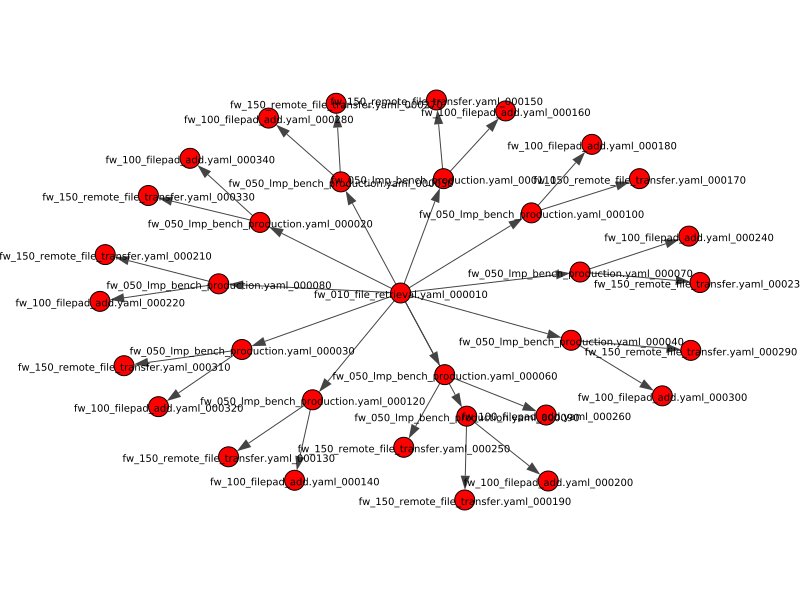

In [117]:
wfb.plot()

In [60]:
wfb = WorkflowBuilder('system.yaml')

INFO:fireworks.utilities.wfb:File 'system.yaml contains the sections ['name', 'metadata', 'std', 'transient', 'persistent', 'dependencies'].
INFO:fireworks.utilities.wfb:Graph contains 4 nodes: ['fw_010_file_retrieval.yaml', 'fw_050_lmp_bench_production.yaml', 'fw_100_filepad_add.yaml', 'fw_150_remote_file_transfer.yaml'].
INFO:fireworks.utilities.wfb:Graph contains 3 edges: [('fw_010_file_retrieval.yaml', 'fw_050_lmp_bench_production.yaml'), ('fw_050_lmp_bench_production.yaml', 'fw_100_filepad_add.yaml'), ('fw_050_lmp_bench_production.yaml', 'fw_150_remote_file_transfer.yaml')].
INFO:fireworks.utilities.wfb:Identified root fw_010_file_retrieval.yaml.


In [61]:
wfb.initialize_template_engine()

In [62]:
try:
    print(wfb.show_undefined_variables())
except Exception as e:
    exc = e
    print(e)

INFO:fireworks.utilities.wfb:Loading template fw_010_file_retrieval.yaml.
INFO:fireworks.utilities.wfb:Loading template fw_050_lmp_bench_production.yaml.
INFO:fireworks.utilities.wfb:Loading template fw_090_equilibration_npt_slab.yaml.
INFO:fireworks.utilities.wfb:Loading template fw_100_filpad_add.yaml.
INFO:fireworks.utilities.wfb:Loading template fw_150_remote_file_transfer.yaml.


╒════════════════════════════════════╤════════╤═════════╤═══════════════╤══════════╤═════════════╤═══════════╤════════════╤═════════╤═════════╤═══════╤═══════════════════╤═════════════╤═══════════╤═══════════════╤══════════════╤══════════╤════════════════════╤═══════════════╤═════════════╤═════════════════╤══════════════════╤═════╤════════════════╤════════════╤═════════╤════════════════╤══════════════════╤════════════╤═════════════╤══════════════╤══════════╤═══════════════╤══════════════╤════════════════╤════════════════╤════════════════╤═══════════════════╤═══════╤════════════╕
│                                    │ worker │ machine │ sf_nmolecules │ walltime │ neigh_every │ remote_ip │ counterion │ sb_name │ solvent │ queue │ indenter_vel_unit │ remote_user │ substrate │ skin_distance │ indenter_vel │ pressure │ indenter_dist_unit │ pressure_unit │ neigh_delay │ sv_density_unit │ temperature_unit │ ppn │ coulomb_cutoff │ surfactant │ ssh_key │ ewald_accuracy │ sb_crystal_plane │ remo

In [56]:
print(exc.source)

{% set identifier = "benchmark/lmp/machine_%s/ewald_accuracy_%s/coulomb_cutoff_%s/skin_distance_%s/neigh_delay_%s/neigh_every_%s"|format(machine, ewald_accuracy, coulomb_cutoff, skin_distance, neigh_delay, neigh_every) %}
spec:
  _tasks:
  - _fw_name: FileTransferTask
    files: 
    - {{ identifier }}.log
    dest:   {{ remote_dir|default("/mnt/dat/work/testuser/benchmark/lmp/20190411",true) }}
    mode:   rtransfer
    server: {{ remote_ip|default("192.52.32.115",true) }}
    user:   {{ remote_user|default("testuser",true) }}
    keyfile_name: {{ ssh_key|default("/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud",true) }}
    ignore_errors: False

name: {{machine}], transfer '{{identifier}}/log.txt' to file pad
spec:
  _category: "{{ worker|default("nemo_noqueue",true) }}"
    _files_in:
      log_file: log.lammps
    _tasks:
    # first delete if file existent
    - _fw_name: DeleteFilesTask
      identifiers: 
      - {{ identifier }}/log.txt
      # - AFM/SDS/646/AU/111/52x30x2/hemic

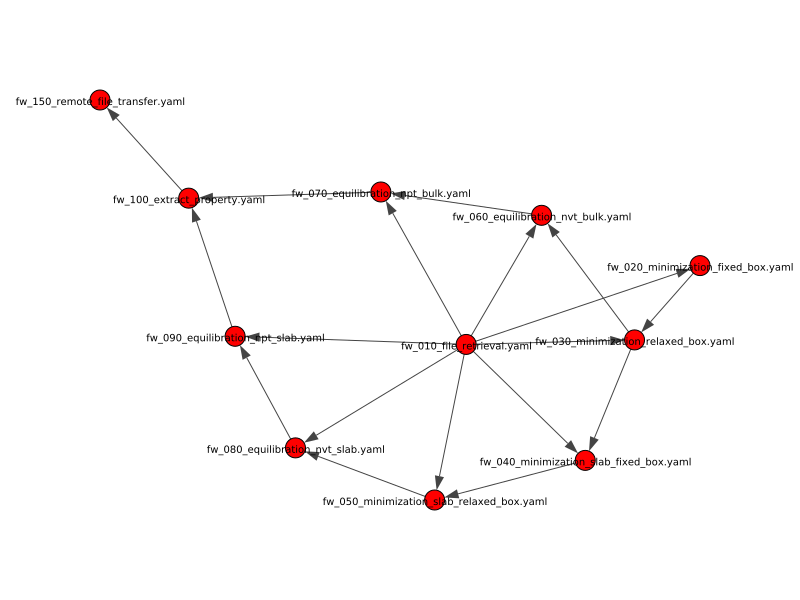

In [2059]:
wfb.plot()

### Conversion to tree with degenerate vertices

In [2060]:
wfb.descend()

[INFO - wfb.py:361 - descend() ] Current topological order: [0, 1, 2, 5, 6, 3, 4, 7, 8, 9, 10] (2019-04-11 16:23:05,256)
[INFO - wfb.py:369 - descend() ] 0: fw_010_file_retrieval.yaml. (2019-04-11 16:23:05,257)
[INFO - wfb.py:369 - descend() ] 1: fw_020_minimization_fixed_box.yaml. (2019-04-11 16:23:05,259)
[INFO - wfb.py:369 - descend() ] 2: fw_030_minimization_relaxed_box.yaml. (2019-04-11 16:23:05,260)
[INFO - wfb.py:377 - descend() ] 2 forks at v: [{3, 4, 7, 8, 9, 10}, {9, 10, 5, 6}]. (2019-04-11 16:23:05,261)
[INFO - wfb.py:387 - descend() ] Lef and right fork: {9, 10, 5, 6}. (2019-04-11 16:23:05,262)
[INFO - wfb.py:389 - descend() ] Overlap: {9, 10}. (2019-04-11 16:23:05,263)
[INFO - wfb.py:394 - descend() ] Current set of vertices: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}. (2019-04-11 16:23:05,264)
[INFO - wfb.py:399 - descend() ] Environment of left fork: {0, 1, 2, 5, 6, 9, 10}. (2019-04-11 16:23:05,265)
[INFO - wfb.py:311 - duplicate_vertex() ] Added vertex 11 - fw_100_extract_prope

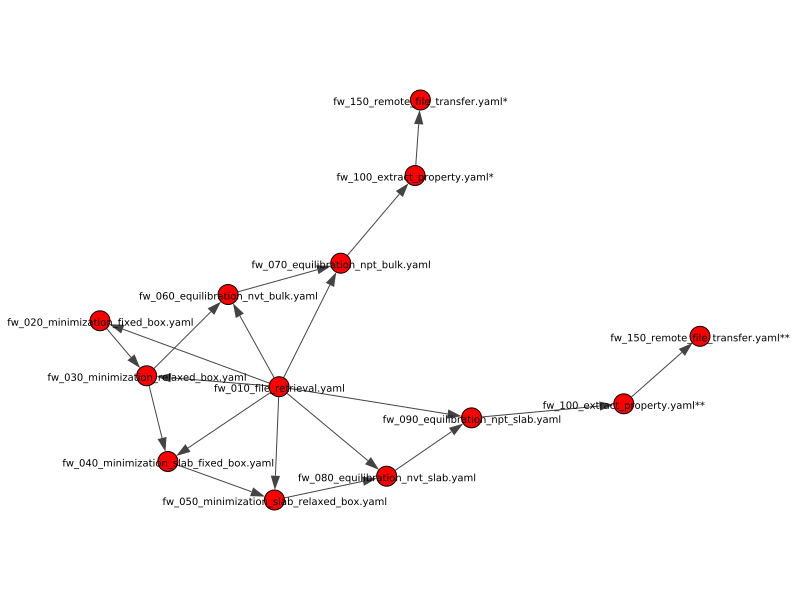

In [2061]:
wfb.plot()

In [2062]:
wfb.initialize_template_engine()

In [2063]:
h = wfb.build_degenerate_graph()

[INFO - wfb.py:505 - build_degenerate_graph() ] Current topological order: [0, 1, 2, 5, 6, 9, 10, 3, 4, 7, 8, 11, 12] (2019-04-11 16:23:06,276)
[INFO - wfb.py:517 - build_degenerate_graph() ] 0: fw_010_file_retrieval.yaml. (2019-04-11 16:23:06,278)
[INFO - wfb.py:518 - build_degenerate_graph() ] Iterating node 0: fw_010_file_retrieval.yaml (2019-04-11 16:23:06,279)
[INFO - wfb.py:492 - select_closest_parent() ] 0: fw_010_file_retrieval.yaml, dist. 0, top.pos. 0 has no parents. (2019-04-11 16:23:06,281)
[INFO - wfb.py:552 - build_degenerate_graph() ] Degeneracy (persistent*transient): 1*1 = 1 (2019-04-11 16:23:06,283)
[DEBUG - wfb.py:554 - build_degenerate_graph() ]   Parent name: None (2019-04-11 16:23:06,284)
[DEBUG - wfb.py:555 - build_degenerate_graph() ]   Parent context: {'machine': 'NEMO', 'pressure': 0, 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/eam/series8', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'substrate_identifier': 'sub

[DEBUG - wfb.py:556 - build_degenerate_graph() ]   Child persistent context updates [{}] (2019-04-11 16:23:06,333)
[DEBUG - wfb.py:557 - build_degenerate_graph() ]   Child transient context updates [{'worker': 'nemo_queue_offline'}] (2019-04-11 16:23:06,333)
[INFO - wfb.py:564 - build_degenerate_graph() ]   Iterating parent fw_010_file_retrieval.yaml_000010: (2019-04-11 16:23:06,334)
[INFO - wfb.py:568 - build_degenerate_graph() ]     Iterating persitent content update 0: (2019-04-11 16:23:06,335)
[DEBUG - wfb.py:572 - build_degenerate_graph() ]       Current persistent context: {'machine': 'NEMO', 'pressure': 0, 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/eam/series8', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'substrate_identifier': 'substrate/AU/111/52x30x8.lammps', 'surfactant': 'SDS', 'temperature': 298, 'worker': 'nemo_noqueue', 'nodes': 1, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express'} (2019-04-11 16:23:06,335)
[INFO - wf

[INFO - wfb.py:568 - build_degenerate_graph() ]     Iterating persitent content update 0: (2019-04-11 16:23:06,375)
[DEBUG - wfb.py:572 - build_degenerate_graph() ]       Current persistent context: {'machine': 'NEMO', 'pressure': 0, 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/eam/series8', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'substrate_identifier': 'substrate/AU/111/52x30x8.lammps', 'surfactant': 'SDS', 'temperature': 298, 'worker': 'nemo_noqueue', 'nodes': 1, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express'} (2019-04-11 16:23:06,376)
[INFO - wfb.py:575 - build_degenerate_graph() ]       Iterating transient content update 0: (2019-04-11 16:23:06,376)
[DEBUG - wfb.py:580 - build_degenerate_graph() ]         Current transient context: {'machine': 'NEMO', 'pressure': 0, 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/eam/series8', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'substrate

[INFO - wfb.py:575 - build_degenerate_graph() ]       Iterating transient content update 0: (2019-04-11 16:23:06,407)
[DEBUG - wfb.py:580 - build_degenerate_graph() ]         Current transient context: {'machine': 'NEMO', 'pressure': 0, 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/eam/series8', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'substrate_identifier': 'substrate/AU/111/52x30x8.lammps', 'surfactant': 'SDS', 'temperature': 298, 'worker': 'nemo_queue_offline', 'nodes': 1, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express'} (2019-04-11 16:23:06,408)
[INFO - wfb.py:311 - duplicate_vertex() ] Added vertex 13 - fw_100_extract_property.yaml*_000010_000020_000030_000040 (2019-04-11 16:23:06,408)
[INFO - wfb.py:311 - duplicate_vertex() ] Added vertex 14 - fw_150_remote_file_transfer.yaml*_000010_000020_000030_000040 (2019-04-11 16:23:06,409)
[INFO - wfb.py:311 - duplicate_vertex() ] Added vertex 15 - fw_060_equilibration_nvt_bulk.yaml_0

[DEBUG - wfb.py:572 - build_degenerate_graph() ]       Current persistent context: {'machine': 'NEMO', 'pressure': 1, 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/eam/series8', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'substrate_identifier': 'substrate/AU/111/52x30x8.lammps', 'surfactant': 'SDS', 'temperature': 298, 'worker': 'nemo_noqueue', 'nodes': 1, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'identifier': '020_equilibration_npt_bulk_1_atm'} (2019-04-11 16:23:06,435)
[INFO - wfb.py:575 - build_degenerate_graph() ]       Iterating transient content update 0: (2019-04-11 16:23:06,435)
[DEBUG - wfb.py:580 - build_degenerate_graph() ]         Current transient context: {'machine': 'NEMO', 'pressure': 1, 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/eam/series8', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'substrate_identifier': 'substrate/AU/111/52x30x8.lammps', 'surfactant': 'SD

[INFO - wfb.py:505 - build_degenerate_graph() ] Current topological order: [0, 1, 2, 9, 13, 14, 15, 12, 10, 11, 3, 4, 5, 6, 7, 8] (2019-04-11 16:23:06,461)
[INFO - wfb.py:513 - build_degenerate_graph() ] 0: fw_010_file_retrieval.yaml_000010 has been visited before, move on. (2019-04-11 16:23:06,461)
[INFO - wfb.py:513 - build_degenerate_graph() ] 1: fw_020_minimization_fixed_box.yaml_000020 has been visited before, move on. (2019-04-11 16:23:06,462)
[INFO - wfb.py:513 - build_degenerate_graph() ] 2: fw_030_minimization_relaxed_box.yaml_000030 has been visited before, move on. (2019-04-11 16:23:06,462)
[INFO - wfb.py:513 - build_degenerate_graph() ] 9: fw_060_equilibration_nvt_bulk.yaml_000040 has been visited before, move on. (2019-04-11 16:23:06,463)
[INFO - wfb.py:513 - build_degenerate_graph() ] 13: fw_070_equilibration_npt_bulk.yaml_000060 has been visited before, move on. (2019-04-11 16:23:06,463)
[INFO - wfb.py:513 - build_degenerate_graph() ] 14: fw_100_extract_property.yaml_000

[DEBUG - wfb.py:556 - build_degenerate_graph() ]   Child persistent context updates [{}] (2019-04-11 16:23:06,498)
[DEBUG - wfb.py:557 - build_degenerate_graph() ]   Child transient context updates [{}] (2019-04-11 16:23:06,499)
[INFO - wfb.py:564 - build_degenerate_graph() ]   Iterating parent fw_070_equilibration_npt_bulk.yaml_000050: (2019-04-11 16:23:06,499)
[INFO - wfb.py:568 - build_degenerate_graph() ]     Iterating persitent content update 0: (2019-04-11 16:23:06,501)
[DEBUG - wfb.py:572 - build_degenerate_graph() ]       Current persistent context: {'machine': 'NEMO', 'pressure': 0, 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/eam/series8', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'substrate_identifier': 'substrate/AU/111/52x30x8.lammps', 'surfactant': 'SDS', 'temperature': 298, 'worker': 'nemo_noqueue', 'nodes': 1, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'identifier': '010_equilibration_npt_bulk_0_atm'} (2019-04

[INFO - wfb.py:621 - build_degenerate_graph() ]       Completed transient content update 0: (2019-04-11 16:23:06,544)
[INFO - wfb.py:623 - build_degenerate_graph() ]     Completed persitent content update 0: (2019-04-11 16:23:06,545)
[INFO - wfb.py:629 - build_degenerate_graph() ]       Modified graph at node 15, rebuilding topological order. (2019-04-11 16:23:06,545)
[INFO - wfb.py:630 - build_degenerate_graph() ] Completed node 15: fw_150_remote_file_transfer.yaml_000100 (2019-04-11 16:23:06,546)
[INFO - wfb.py:505 - build_degenerate_graph() ] Current topological order: [0, 1, 2, 9, 11, 12, 13, 10, 14, 15, 3, 4, 5, 6, 7, 8] (2019-04-11 16:23:06,547)
[INFO - wfb.py:513 - build_degenerate_graph() ] 0: fw_010_file_retrieval.yaml_000010 has been visited before, move on. (2019-04-11 16:23:06,548)
[INFO - wfb.py:513 - build_degenerate_graph() ] 1: fw_020_minimization_fixed_box.yaml_000020 has been visited before, move on. (2019-04-11 16:23:06,549)
[INFO - wfb.py:513 - build_degenerate_grap

[INFO - wfb.py:513 - build_degenerate_graph() ] 0: fw_010_file_retrieval.yaml_000010 has been visited before, move on. (2019-04-11 16:23:06,585)
[INFO - wfb.py:513 - build_degenerate_graph() ] 1: fw_020_minimization_fixed_box.yaml_000020 has been visited before, move on. (2019-04-11 16:23:06,586)
[INFO - wfb.py:513 - build_degenerate_graph() ] 2: fw_030_minimization_relaxed_box.yaml_000030 has been visited before, move on. (2019-04-11 16:23:06,586)
[INFO - wfb.py:513 - build_degenerate_graph() ] 10: fw_040_minimization_slab_fixed_box.yaml_000110 has been visited before, move on. (2019-04-11 16:23:06,587)
[INFO - wfb.py:517 - build_degenerate_graph() ] 11: fw_050_minimization_slab_relaxed_box.yaml_000010_000020_000030_000110. (2019-04-11 16:23:06,587)
[INFO - wfb.py:518 - build_degenerate_graph() ] Iterating node 11: fw_050_minimization_slab_relaxed_box.yaml_000010_000020_000030_000110 (2019-04-11 16:23:06,588)
[INFO - wfb.py:471 - select_closest_parent() ] 11: fw_050_minimization_slab_

[INFO - wfb.py:552 - build_degenerate_graph() ] Degeneracy (persistent*transient): 1*1 = 1 (2019-04-11 16:23:06,618)
[DEBUG - wfb.py:554 - build_degenerate_graph() ]   Parent name: fw_050_minimization_slab_relaxed_box.yaml_000120 (2019-04-11 16:23:06,618)
[DEBUG - wfb.py:555 - build_degenerate_graph() ]   Parent context: {'machine': 'NEMO', 'pressure': 0, 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/eam/series8', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'substrate_identifier': 'substrate/AU/111/52x30x8.lammps', 'surfactant': 'SDS', 'temperature': 298, 'worker': 'nemo_noqueue', 'nodes': 1, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express'} (2019-04-11 16:23:06,619)
[DEBUG - wfb.py:556 - build_degenerate_graph() ]   Child persistent context updates [{}] (2019-04-11 16:23:06,620)
[DEBUG - wfb.py:557 - build_degenerate_graph() ]   Child transient context updates [{'worker': 'nemo_queue_offline'}] (2019-04-11 16:23:06,620)
[INFO - wfb.py

[INFO - wfb.py:575 - build_degenerate_graph() ]       Iterating transient content update 0: (2019-04-11 16:23:06,669)
[DEBUG - wfb.py:580 - build_degenerate_graph() ]         Current transient context: {'machine': 'NEMO', 'pressure': 0, 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/eam/series8', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'substrate_identifier': 'substrate/AU/111/52x30x8.lammps', 'surfactant': 'SDS', 'temperature': 298, 'worker': 'nemo_queue_offline', 'nodes': 1, 'ppn': 20, 'walltime': 3600, 'queue': '', 'identifier': '030_equilibration_npt_slab_0_atm'} (2019-04-11 16:23:06,669)
[INFO - wfb.py:311 - duplicate_vertex() ] Added vertex 16 - fw_090_equilibration_npt_slab.yaml_000010_000020_000030_000110_000120_000130_000140 (2019-04-11 16:23:06,670)
[INFO - wfb.py:311 - duplicate_vertex() ] Added vertex 17 - fw_100_extract_property.yaml**_000010_000020_000030_000110_000120_000130_000140 (2019-04-11 16:23:06,670)
[INFO - wfb.py:

[DEBUG - wfb.py:572 - build_degenerate_graph() ]       Current persistent context: {'machine': 'NEMO', 'pressure': 1, 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/eam/series8', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'substrate_identifier': 'substrate/AU/111/52x30x8.lammps', 'surfactant': 'SDS', 'temperature': 298, 'worker': 'nemo_noqueue', 'nodes': 1, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'identifier': '040_equilibration_npt_slab_1_atm'} (2019-04-11 16:23:06,698)
[INFO - wfb.py:575 - build_degenerate_graph() ]       Iterating transient content update 0: (2019-04-11 16:23:06,698)
[DEBUG - wfb.py:580 - build_degenerate_graph() ]         Current transient context: {'machine': 'NEMO', 'pressure': 1, 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/substrate/eam/series8', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'substrate_identifier': 'substrate/AU/111/52x30x8.lammps', 'surfactant': 'SD

[INFO - wfb.py:505 - build_degenerate_graph() ] Current topological order: [0, 1, 2, 10, 11, 12, 16, 17, 18, 13, 14, 15, 3, 5, 6, 7, 4, 8, 9] (2019-04-11 16:23:06,727)
[INFO - wfb.py:513 - build_degenerate_graph() ] 0: fw_010_file_retrieval.yaml_000010 has been visited before, move on. (2019-04-11 16:23:06,727)
[INFO - wfb.py:513 - build_degenerate_graph() ] 1: fw_020_minimization_fixed_box.yaml_000020 has been visited before, move on. (2019-04-11 16:23:06,728)
[INFO - wfb.py:513 - build_degenerate_graph() ] 2: fw_030_minimization_relaxed_box.yaml_000030 has been visited before, move on. (2019-04-11 16:23:06,729)
[INFO - wfb.py:513 - build_degenerate_graph() ] 10: fw_040_minimization_slab_fixed_box.yaml_000110 has been visited before, move on. (2019-04-11 16:23:06,730)
[INFO - wfb.py:513 - build_degenerate_graph() ] 11: fw_050_minimization_slab_relaxed_box.yaml_000120 has been visited before, move on. (2019-04-11 16:23:06,730)
[INFO - wfb.py:513 - build_degenerate_graph() ] 12: fw_080_

[INFO - wfb.py:517 - build_degenerate_graph() ] 18: fw_150_remote_file_transfer.yaml**_000010_000020_000030_000110_000120_000130_000140_000180. (2019-04-11 16:23:06,755)
[INFO - wfb.py:518 - build_degenerate_graph() ] Iterating node 18: fw_150_remote_file_transfer.yaml**_000010_000020_000030_000110_000120_000130_000140_000180 (2019-04-11 16:23:06,756)
[INFO - wfb.py:471 - select_closest_parent() ] 18: fw_150_remote_file_transfer.yaml**_000010_000020_000030_000110_000120_000130_000140_000180, dist. 8, top.pos. 10 has 1 parents with distances [7]: (2019-04-11 16:23:06,756)
[INFO - wfb.py:474 - select_closest_parent() ]   17: fw_100_extract_property.yaml_000180, dist. 7, top. pos. 9 (2019-04-11 16:23:06,757)
[INFO - wfb.py:479 - select_closest_parent() ]     Maximum distance 7 at parent [17] (2019-04-11 16:23:06,757)
[INFO - wfb.py:490 - select_closest_parent() ]   17: fw_100_extract_property.yaml_000180, dist. 7, top. pos. 9 selected as immediate parent (2019-04-11 16:23:06,758)
[INFO - 

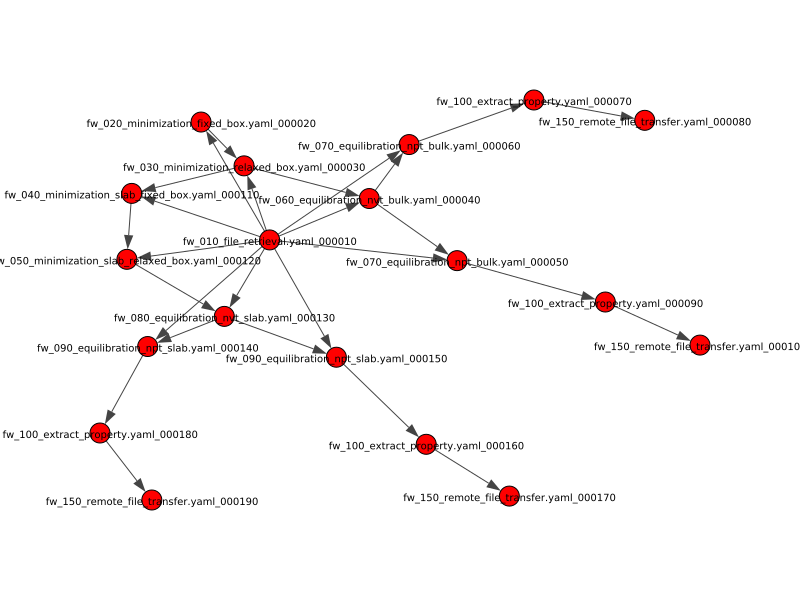

In [2064]:
wfb.plot(wfb.h)

In [2065]:
print(wfb.show_attributes())

--  ------------------------------------------------  -----------------------------------------  -----  ----  ----------  -----
    name                                              template                                   order  dist  degeneracy  fw_id
0   fw_010_file_retrieval.yaml_000010                 fw_010_file_retrieval.yaml                 0      0     1           10
1   fw_020_minimization_fixed_box.yaml_000020         fw_020_minimization_fixed_box.yaml         1      1     1           20
2   fw_030_minimization_relaxed_box.yaml_000030       fw_030_minimization_relaxed_box.yaml       2      2     1           30
3   fw_060_equilibration_nvt_bulk.yaml_000040         fw_060_equilibration_nvt_bulk.yaml         10     3     1           40
4   fw_070_equilibration_npt_bulk.yaml_000050         fw_070_equilibration_npt_bulk.yaml         11     4     2           50
5   fw_070_equilibration_npt_bulk.yaml_000060         fw_070_equilibration_npt_bulk.yaml         12     4     2        

## Build Workflow

In [2066]:
wfb.g.vs[0]["transient"]

{'machine': 'NEMO',
 'nodes': 1,
 'ppn': 20,
 'pressure': 0,
 'queue': 'express',
 'remote_dir': '/mnt/dat/work/testuser/substrate/eam/series8',
 'remote_user': 'testuser',
 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud',
 'substrate_identifier': 'substrate/AU/111/52x30x8.lammps',
 'surfactant': 'SDS',
 'temperature': 298,
 'walltime': '00:15:00',
 'worker': 'nemo_noqueue'}

In [2069]:
wfb.fill_templates()

In [2070]:
wfb.compile_workflow()

[INFO - wfb.py:152 - compile_workflow() ] Set of Fireworks:{'fw_150_remote_file_transfer.yaml_000170', 'fw_150_remote_file_transfer.yaml_000080', 'fw_020_minimization_fixed_box.yaml_000020', 'fw_100_extract_property.yaml_000180', 'fw_080_equilibration_nvt_slab.yaml_000130', 'fw_100_extract_property.yaml_000090', 'fw_030_minimization_relaxed_box.yaml_000030', 'fw_060_equilibration_nvt_bulk.yaml_000040', 'fw_070_equilibration_npt_bulk.yaml_000060', 'fw_090_equilibration_npt_slab.yaml_000140', 'fw_090_equilibration_npt_slab.yaml_000150', 'fw_050_minimization_slab_relaxed_box.yaml_000120', 'fw_100_extract_property.yaml_000070', 'fw_100_extract_property.yaml_000160', 'fw_150_remote_file_transfer.yaml_000100', 'fw_070_equilibration_npt_bulk.yaml_000050', 'fw_150_remote_file_transfer.yaml_000190', 'fw_010_file_retrieval.yaml_000010', 'fw_040_minimization_slab_fixed_box.yaml_000110'}. (2019-04-11 16:24:04,027)
[INFO - wfb.py:157 - compile_workflow() ] Loading files 'fw_150_remote_file_transfer

NameError: name 'fw_id' is not defined

In [1945]:
pp = PrettyPrinter(indent=2)

In [1946]:
fws_yaml = sorted(glob("fw_*.yaml"))

In [1947]:
print(tabulate( [ [ row ] for row in fws_yaml ] ,headers=["Files"],tablefmt='simple'))

Files
-------


In [1983]:
print(wfb.show_attributes(exclude=["name"]))

--  ------------------------------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  -----------------------------------------  -----  ----  --------------------------------

In [40]:
pp.pprint(metadata)

{ 'metadata': { 'pbc': 111,
                'pressure': 0,
                'pressure_unit': 'atm',
                'sb_area': 2.20374e-16,
                'sb_area_unit': 'm^2',
                'sb_crystal_plane': 111,
                'sb_measures': [1.47e-08, 1.5e-08, 5.6e-09],
                'sb_measures_unit': 'm',
                'sb_multiples': [51, 30, 8],
                'sb_name': 'AU_111_51x30x8',
                'sb_normal': 2,
                'sb_thickness': 5.6e-09,
                'sb_thickness_unit': 'm',
                'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],
                'sb_unit_cell_unit': 'm',
                'sb_volume': 3.11331e-25,
                'sb_volume_unit': 'm^3',
                'state': 'trial minimization with eam potential',
                'substrate': 'AU',
                'system_name': 'AU_111_51x30x8',
                'temperature': 298,
                'temperature_unit': 'K'},
  'name': 'NEMO TRIAL: LAMMPS minimization and equilibration

In [41]:
assert "metadata" in metadata

In [42]:
assert "name" in metadata

In [43]:
fws_id = { fw: (-10*(i+1)) for i, fw in enumerate(fws_set) }

In [1948]:
pp.pprint(fws_id)

NameError: name 'fws_id' is not defined

In [20]:
fws_dict = { fw: Firework.from_file(fw, f_format='yaml') for fw in fws_set }

In [21]:
for name, fw in fws_dict.items():
    fw.fw_id = fws_id[name]

In [22]:
links = { 
    fws_dict[parent]: [ 
        fws_dict[child] for child in children ] for parent, children in dependencies.items() }

In [23]:
fws_list = list(fws_dict.values())

In [24]:
wf = Workflow( fws_list, links, name=metadata["name"], metadata=metadata["metadata"]  )

In [25]:
wf.to_file("wf.yaml",f_format='yaml')